# Time series Visualizations

Since the data is categorical majorly, we decided to use stacked area plot, PLOT 2 and PLOT 3 for easy understanding of the data.

In [48]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("final_merged_dataset.csv") # Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong
df.sample(7)

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
489,ISFJ,"Leonide ""Leo"" Moguy",Django Unchained,2012.0,"Drama, Western",162805434.0,8.4,81.0
972,INTP,Beaumont Kin,Star Wars,1983.0,"Action, Adventure, Sci-Fi",NaN,8.1,NaN
1294,ENTP,Agent Locke,The Fast And The Furious,1954.0,"Crime, Drama, Mystery",250000.0,5.4,NaN
572,INTP,Grace Augustine,Avatar,2009.0,"Action, Adventure, Fantasy",760507625.0,7.8,83.0
2556,ESTP,William,Copenhagen,2002.0,"Drama, History, War",NaN,7.4,NaN
1504,ENFP,"Oswald Cobblepot ""The Penguin""",Batman,2004.0,"Animation, Action, Adventure",NaN,7.3,NaN
856,ENFJ,Bail Organa,Star Wars,1983.0,"Action, Adventure, Sci-Fi",NaN,8.1,NaN


## PLOT 1: Frequency of each MBTI type over the years

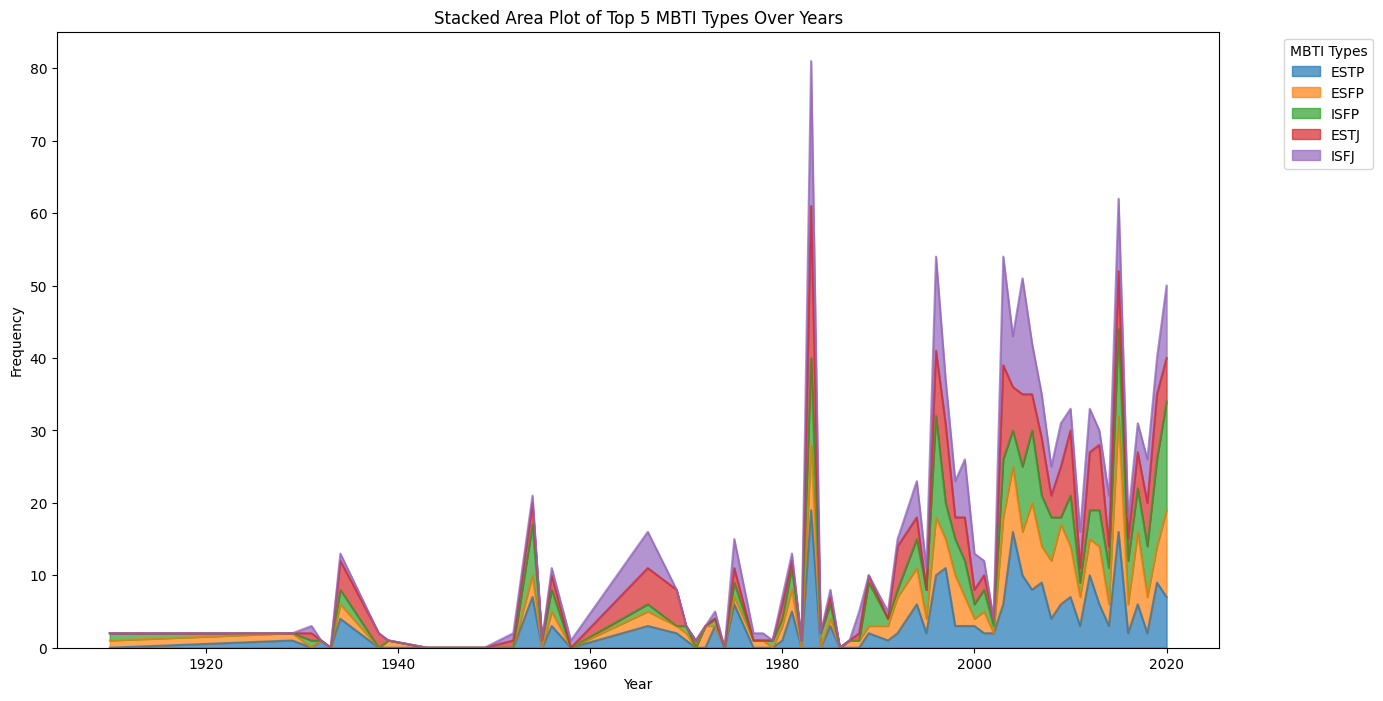

In [50]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Frequency of each MBTI type over the years
# Grouping data by release year and MBTI type and counting the occurrences
mbti_over_time = df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Selecting the top 5 most common MBTI types for the plot
top_mbti_types = mbti_over_time.sum().sort_values(ascending=False).head(5).index
mbti_simplified = mbti_over_time[top_mbti_types]

# Creating the stacked area plot
fig, ax = plt.subplots(figsize=(15, 8))
mbti_simplified.plot(kind='area', stacked=True, ax=ax, alpha=0.7)
ax.set_title('Stacked Area Plot of Top 5 MBTI Types Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.legend(title='MBTI Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



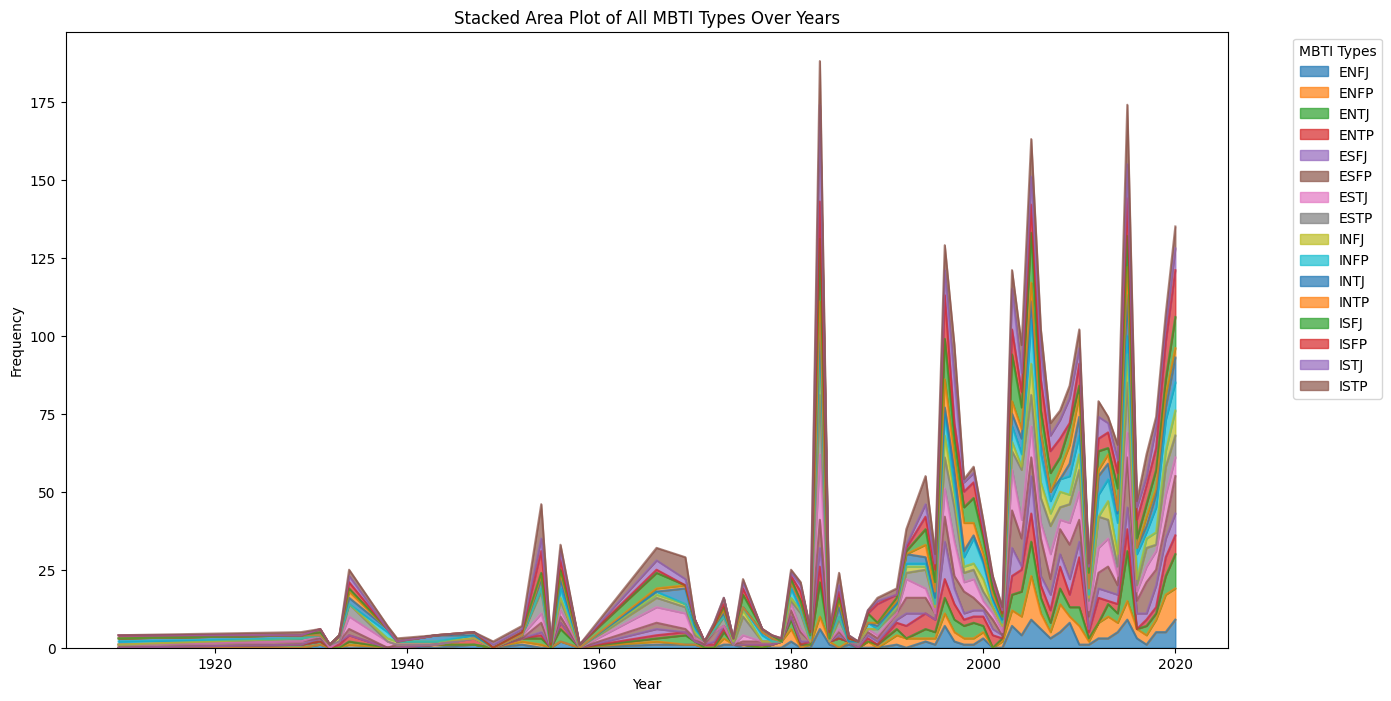

In [51]:
# Grouping data by release year and MBTI type and counting the occurrences
mbti_over_time_all = df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Creating the stacked area plot for all MBTI types
fig, ax = plt.subplots(figsize=(15, 8))
mbti_over_time_all.plot(kind='area', stacked=True, ax=ax, alpha=0.7)
ax.set_title('Stacked Area Plot of All MBTI Types Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.legend(title='MBTI Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## PLOT 2: Most frequently used MBTI character type

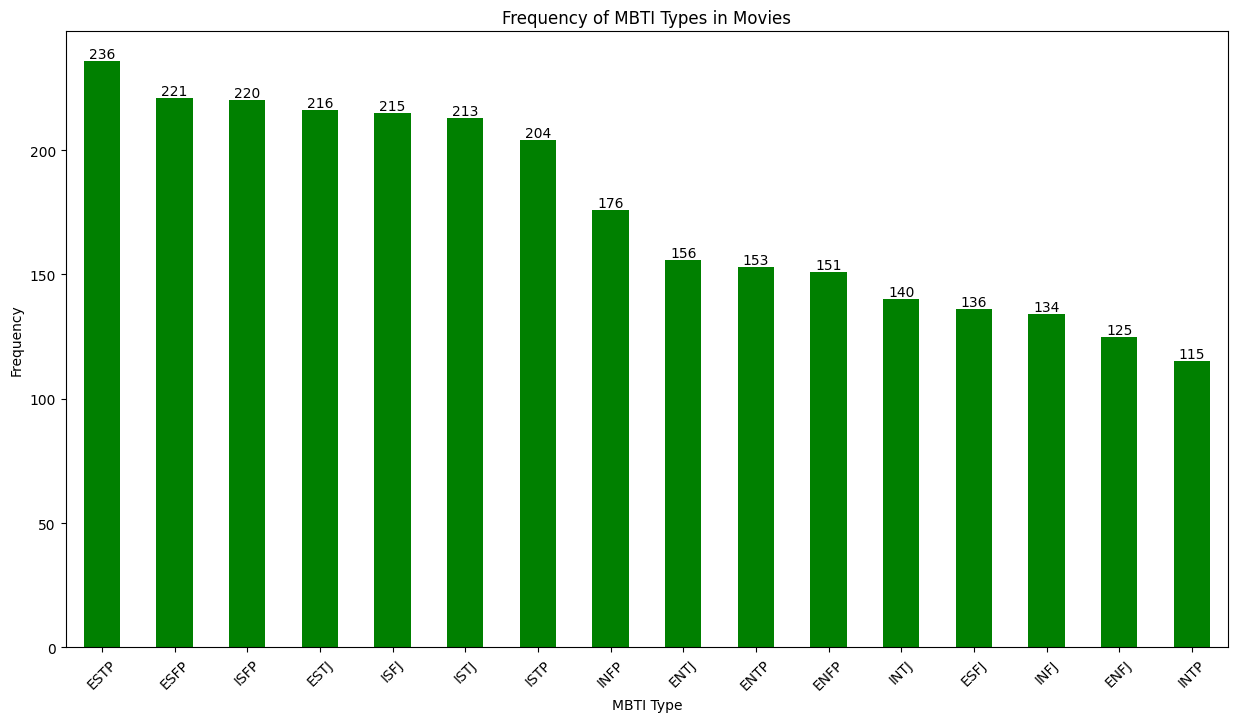

In [52]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Most frequently used MBTI character type
mbti_counts = df['mbti'].value_counts()

# Creating the bar plot
fig, ax = plt.subplots(figsize=(15, 8))
mbti_counts.plot(kind='bar', color='green', ax=ax)
ax.set_title('Frequency of MBTI Types in Movies')
ax.set_xlabel('MBTI Type')
ax.set_ylabel('Frequency')
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)
plt.show()


# PLOT 3 :Average Movie Score by Year

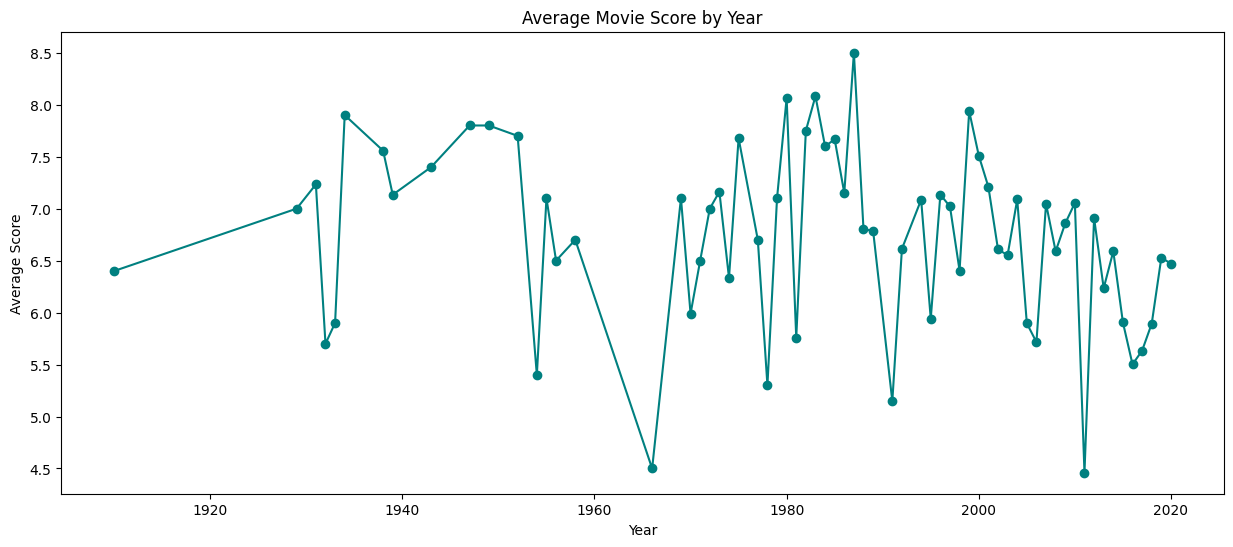

In [53]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Average Movie Score by Year
# Calculating the average movie score by year
average_score_by_year = df.groupby('release_year')['score'].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(15, 6))
average_score_by_year.plot(kind='line', color='teal', marker='o', ax=ax)
ax.set_title('Average Movie Score by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')

plt.show()


# PLOT 4: Annual Movie Revenue Trend - Line Chart

Text(0, 0.5, 'Total Revenue')

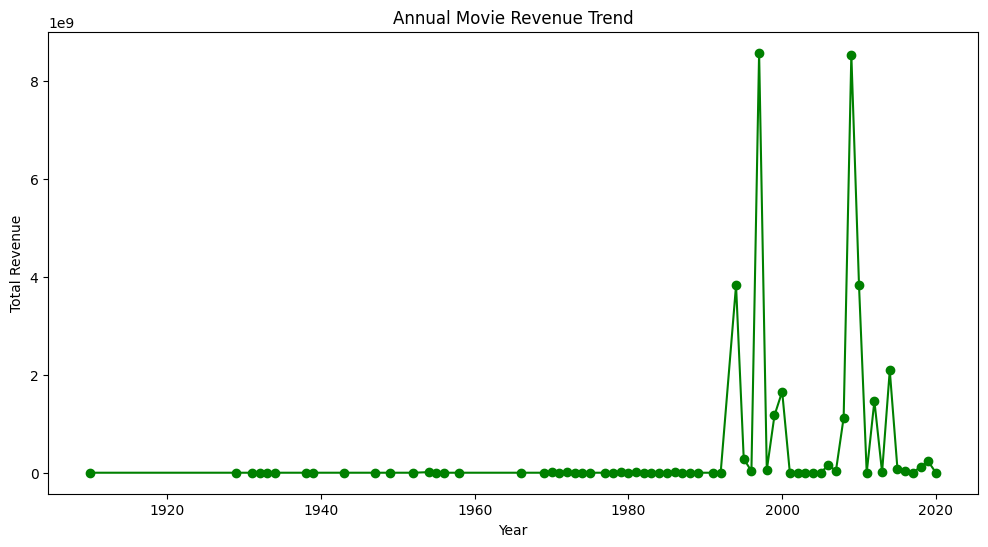

In [54]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# MBTI Distribution Over Years - Count Plot
mbti_trend = df['mbti'].groupby(df['release_year']).value_counts().unstack(fill_value=0)


# Plot 1: Annual Movie Revenue Trend - Line Chart
revenue_trend = df.groupby('release_year')['revenue'].sum()
fig, ax1 = plt.subplots(figsize=(12, 6))
revenue_trend.plot(kind='line', color='green', marker='o', ax=ax1)
ax1.set_title('Annual Movie Revenue Trend')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue')




# PLOT 5 : Average Movie Score by Year - Scatter Plot with Trend Line

Text(0, 0.5, 'Average Score')

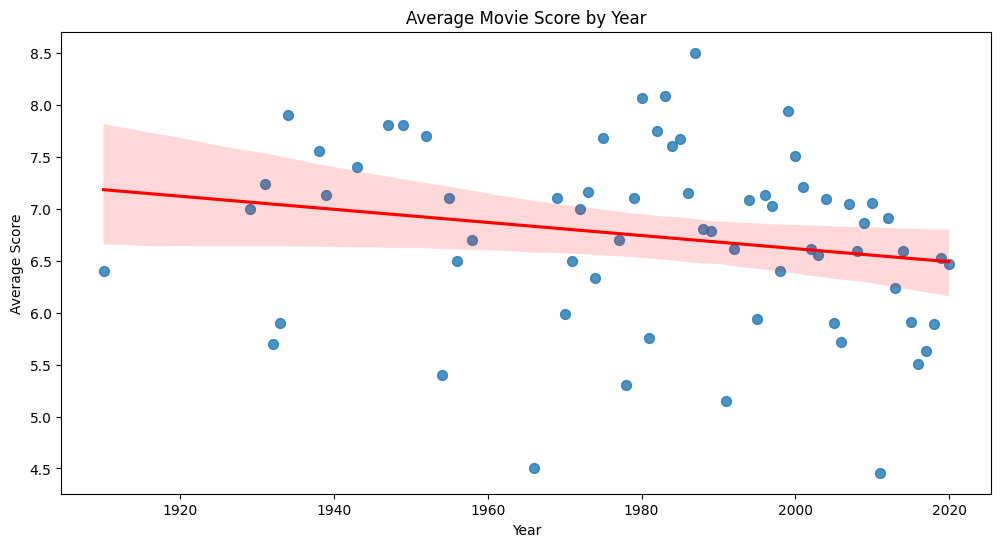

In [55]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

#  Average Movie Score by Year - Scatter Plot with Trend Line
score_trend = df.groupby('release_year')['score'].mean()
fig, ax2 = plt.subplots(figsize=(12, 6))
sns.regplot(x=score_trend.index, y=score_trend.values, ax=ax2, scatter_kws={'s': 50}, line_kws={"color": "red"})
ax2.set_title('Average Movie Score by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Score')


# PLOT 6: Selecting the top 5 MBTI types for the bump chart

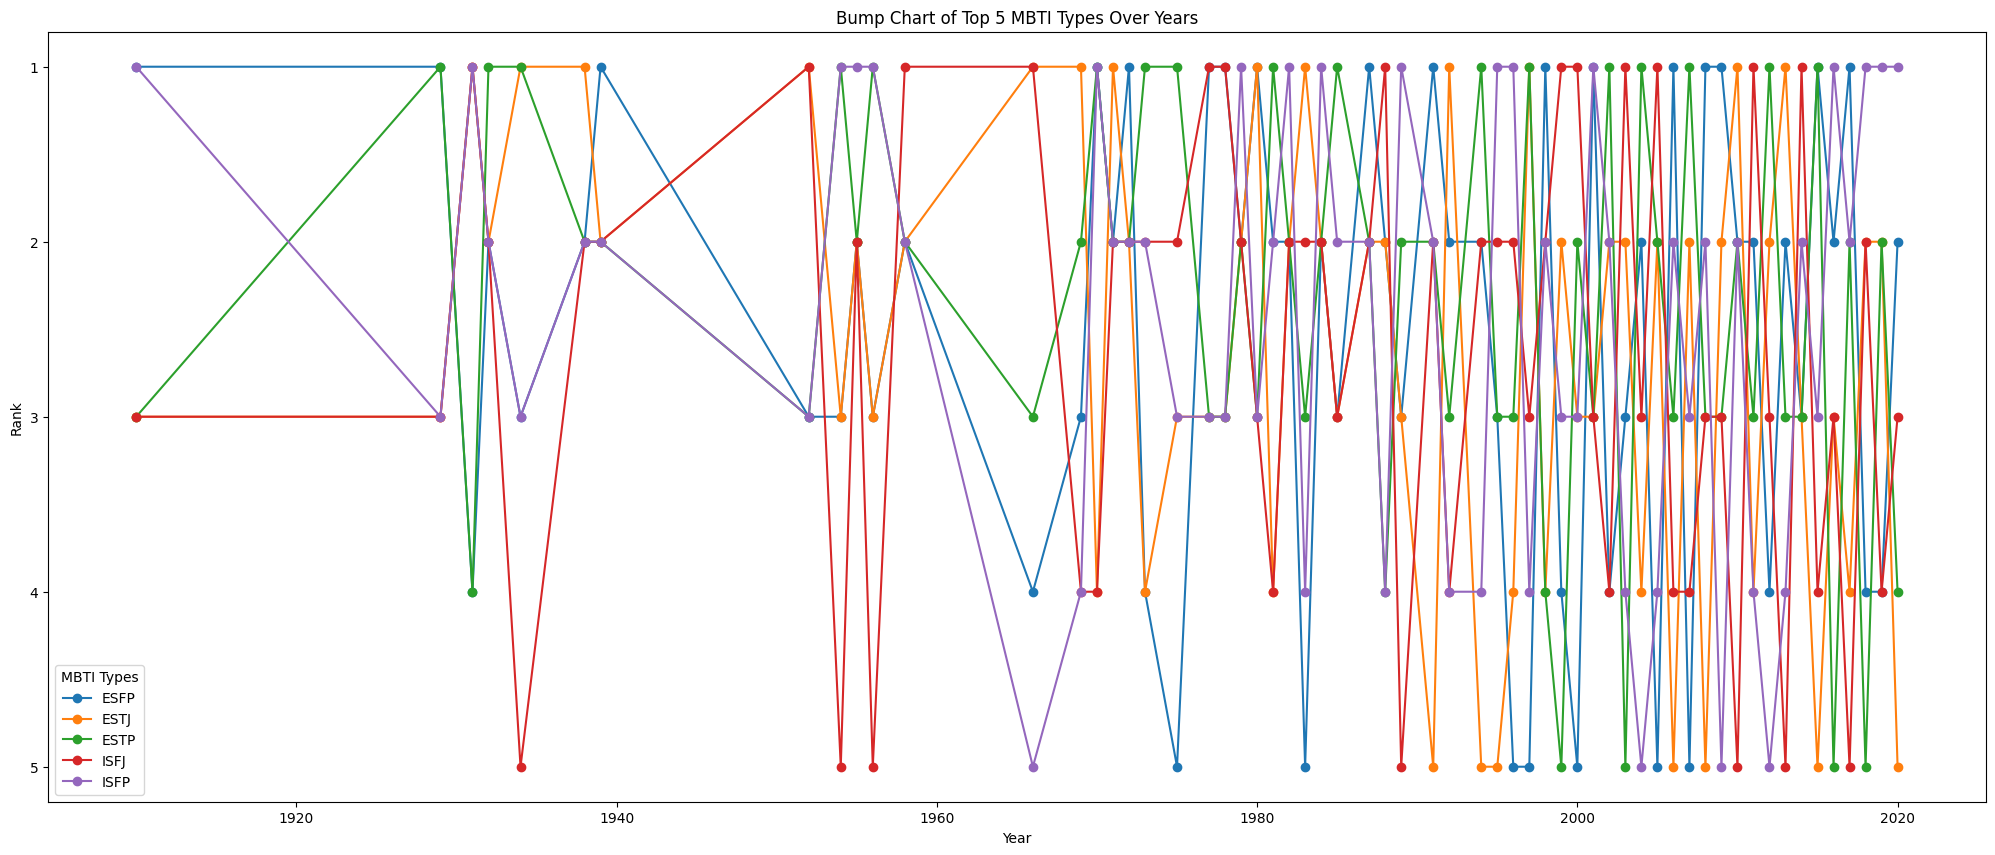

In [56]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Selecting the top 5 MBTI types for the bump chart
top_mbti_types = df['mbti'].value_counts().head(5).index

# Filtering the data for only the top 5 MBTI types
top_mbti_df = df[df['mbti'].isin(top_mbti_types)]

# Grouping by year and MBTI type, then counting the occurrences
mbti_counts = top_mbti_df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Calculating rankings for each year
rankings = mbti_counts.rank(axis=1, method='min', ascending=False)

# Creating the bump chart
fig, ax = plt.subplots(figsize=(25, 10))
for mbti_type in rankings.columns:
    ax.plot(rankings.index, rankings[mbti_type], label=mbti_type, marker='o')
ax.set_yticks(range(1, len(rankings.columns) + 1))
ax.set_yticklabels(range(1, len(rankings.columns) + 1))
ax.invert_yaxis()  # Invert y-axis so that rank 1 is at the top
ax.set_title('Bump Chart of Top 5 MBTI Types Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Rank')
ax.legend(title='MBTI Types')

plt.show()


# PLOT 6 : Selecting the top 5 MBTI types for the slope chart

/var/folders/0n/qqmnpgh93cd_z3ptl2h4znxw0000gn/T/ipykernel_29817/249370915.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', num_mbti_types)


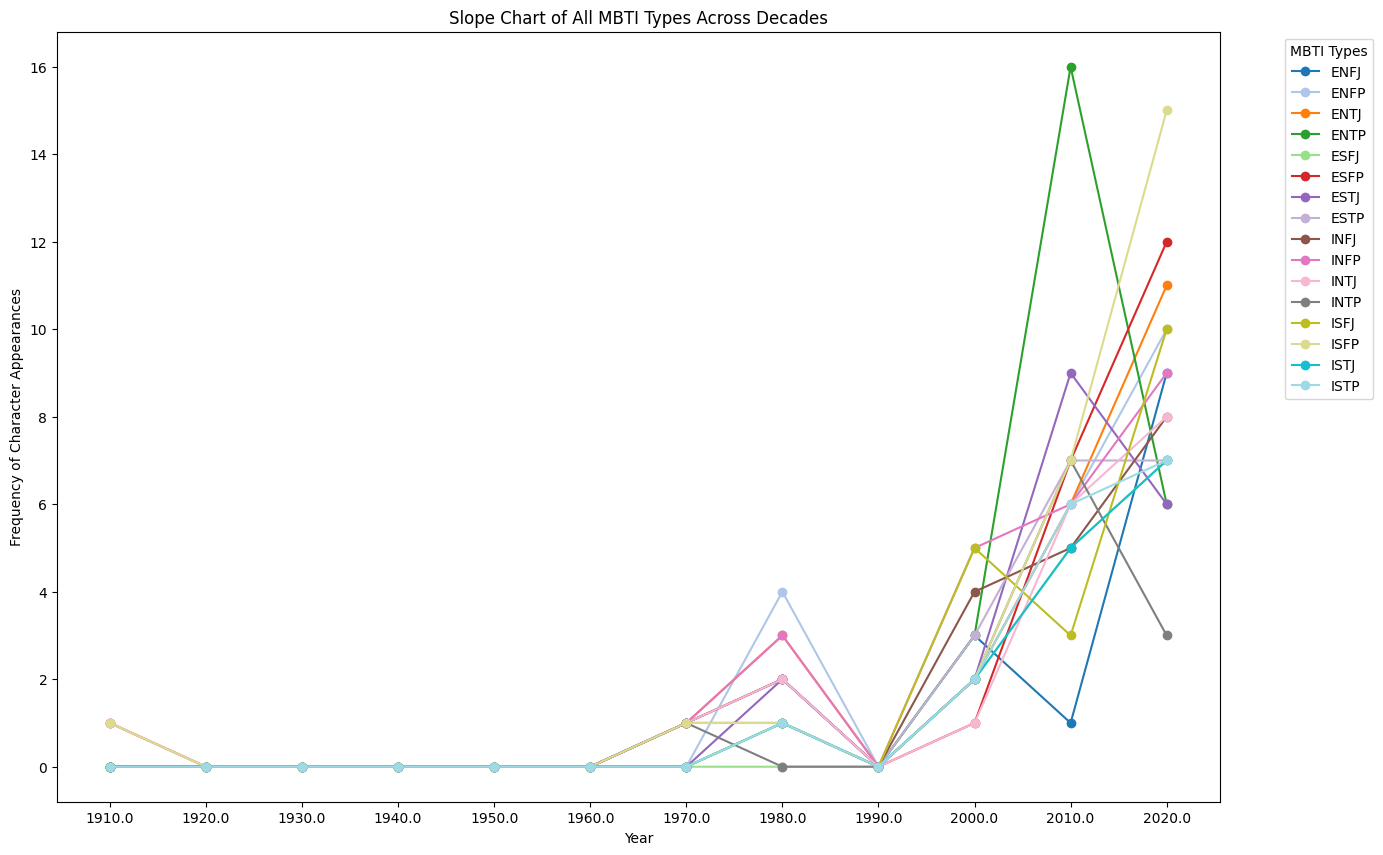

In [57]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Calculating decade intervals to ensure a full decade difference
decade_intervals_full = np.arange(df['release_year'].min(), df['release_year'].max() + 1, 10)

# Grouping by year and MBTI type, then counting the occurrences for all MBTI types for the full decade intervals
mbti_counts_all_decades = df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0).reindex(decade_intervals_full, fill_value=0)

# Generating a unique color for each MBTI type
num_mbti_types = df['mbti'].nunique()
color_palette = plt.cm.get_cmap('tab20', num_mbti_types)

# Plotting the Slope Chart for all MBTI types with a decade difference in x-ticks
fig, ax = plt.subplots(figsize=(15, 10))
for i, mbti_type in enumerate(mbti_counts_all_decades.columns):
    ax.plot(mbti_counts_all_decades.index, mbti_counts_all_decades[mbti_type], label=mbti_type, marker='o', color=color_palette(i))
ax.set_xticks(decade_intervals_full)
ax.set_xticklabels(decade_intervals_full)
ax.set_title('Slope Chart of All MBTI Types Across Decades')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency of Character Appearances')
ax.legend(title='MBTI Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# PLOT 7 : Generating decade intervals from the minimum to the maximum year in the dataset

/var/folders/0n/qqmnpgh93cd_z3ptl2h4znxw0000gn/T/ipykernel_29817/1832279820.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', num_mbti_types)


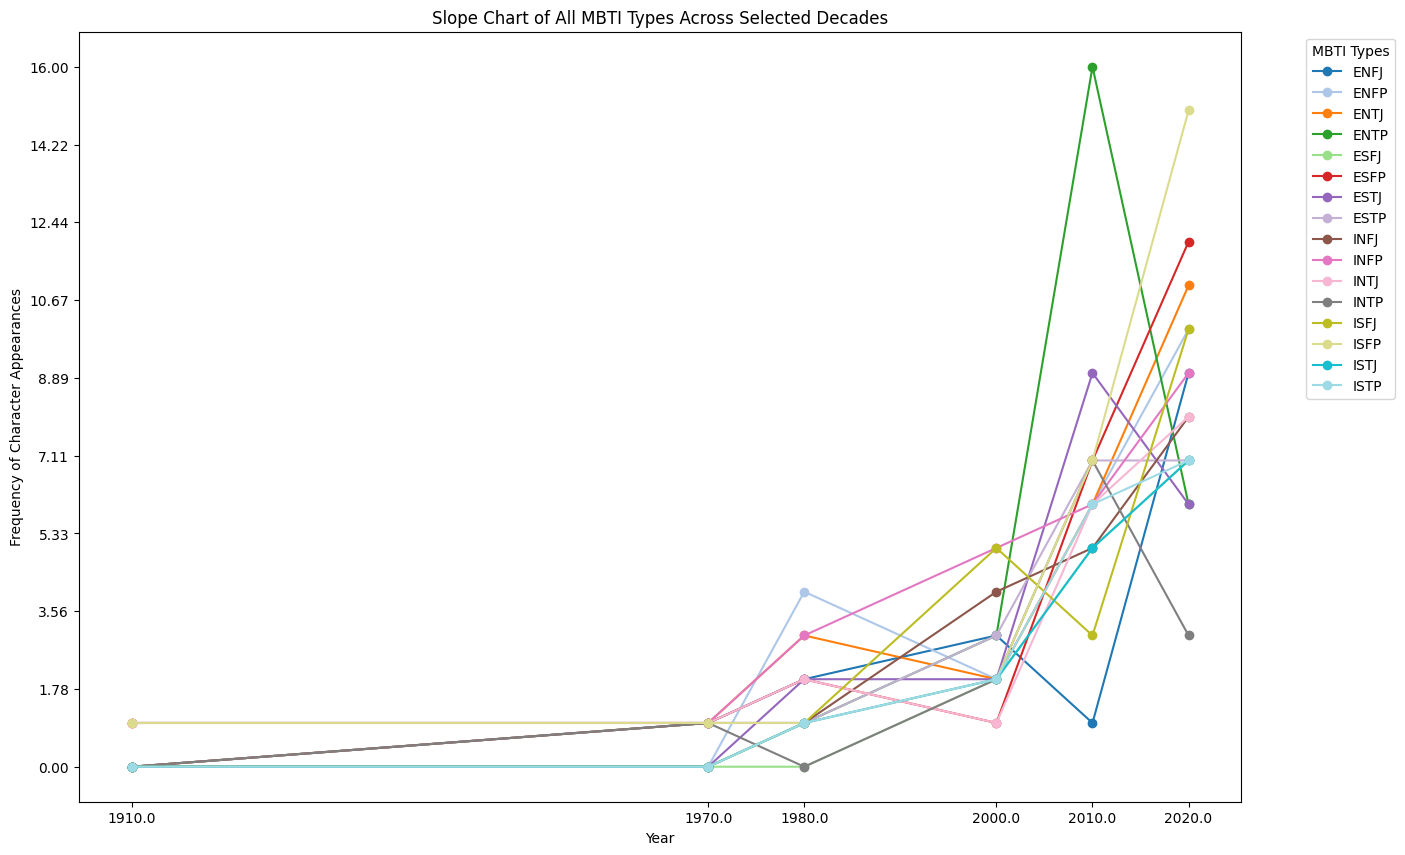

In [58]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Generating decade intervals from the minimum to the maximum year in the dataset
decade_intervals = np.arange(df['release_year'].min(), df['release_year'].max() + 1, 10)

# Filtering to include only the years that are in the dataset
available_years = df['release_year'].unique()
decade_years_in_data = [year for year in decade_intervals if year in available_years]

# Grouping by year and MBTI type, then counting the occurrences for all MBTI types for the available years
mbti_counts_all = df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0).loc[decade_years_in_data]

# Generating a unique color for each MBTI type
num_mbti_types = df['mbti'].nunique()
color_palette = plt.cm.get_cmap('tab20', num_mbti_types)

# Plotting the Slope Chart for all MBTI types
fig, ax = plt.subplots(figsize=(15, 10))
for i, mbti_type in enumerate(mbti_counts_all.columns):
    ax.plot(mbti_counts_all.index, mbti_counts_all[mbti_type], label=mbti_type, marker='o', color=color_palette(i))
ax.set_xticks(decade_years_in_data)
ax.set_xticklabels(decade_years_in_data)

# Increasing the number of y-ticks for better granularity
max_count = mbti_counts_all.max().max()
ax.set_yticks(np.linspace(0, max_count, min(10, max_count + 1)))  # At most 10 y-ticks

ax.set_title('Slope Chart of All MBTI Types Across Selected Decades')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency of Character Appearances')
ax.legend(title='MBTI Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# PLOT 8 :

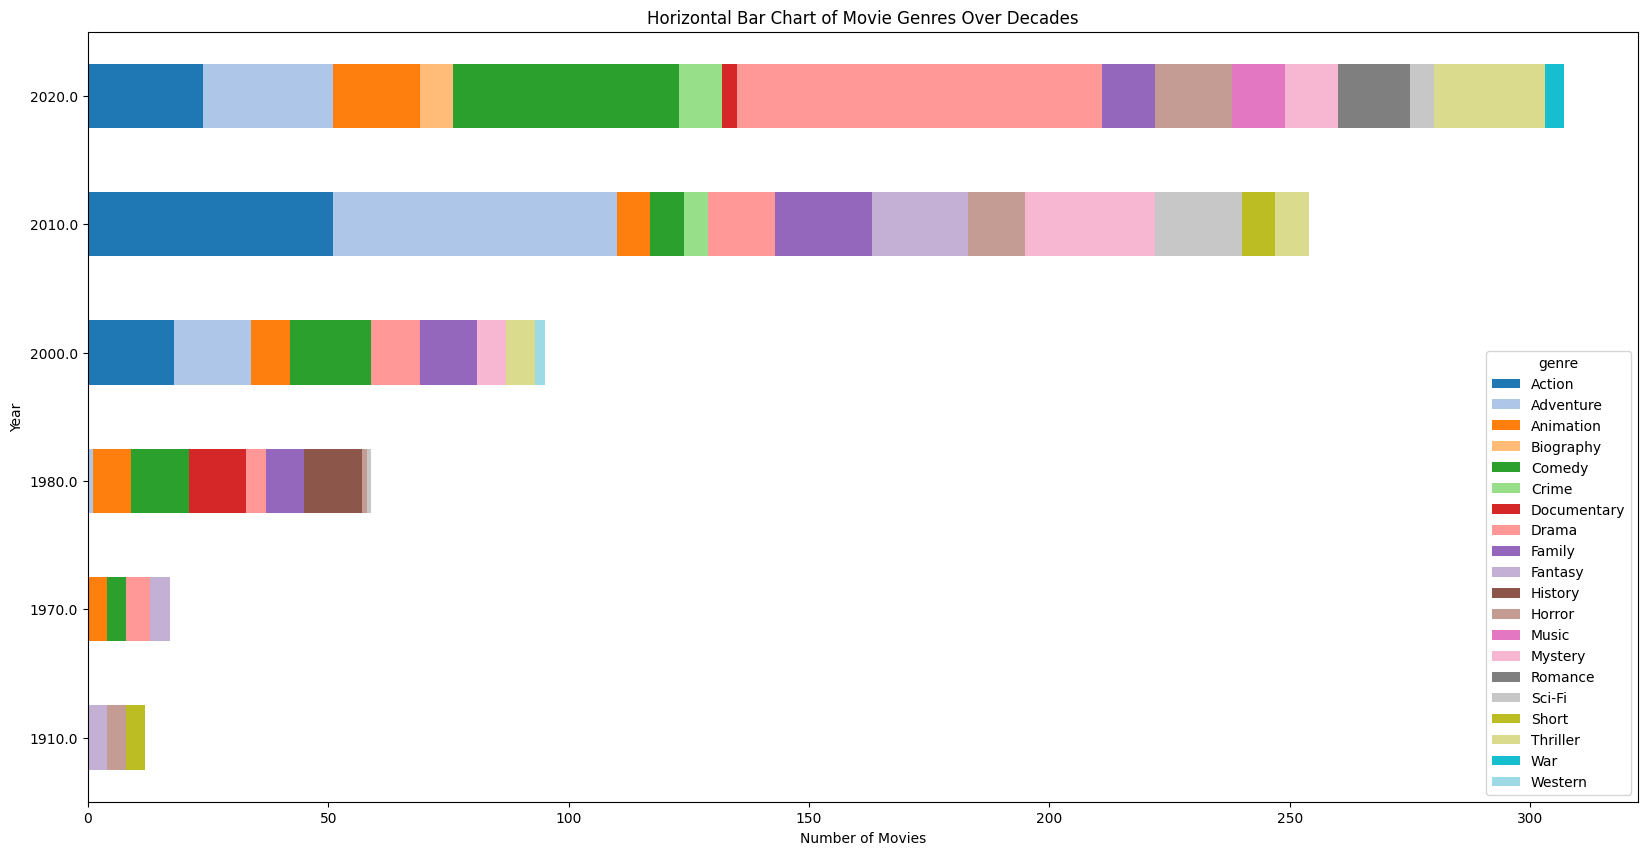

In [59]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Splitting genres into individual genres for each movie
df_expanded_genre_year = df.drop('genre', axis=1).join(
    df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
)

# Filtering the data for years with a decade gap
decade_gap_years = np.arange(df['release_year'].min(), df['release_year'].max() + 1, 10)
genre_year_data_decade = df_expanded_genre_year[df_expanded_genre_year['release_year'].isin(decade_gap_years)]

# Grouping by year and genre and counting occurrences
genre_year_counts = genre_year_data_decade.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Plotting a horizontal bar chart for each genre
fig, ax = plt.subplots(figsize=(20, 10))
genre_year_counts.plot(kind='barh', stacked=True, ax=ax, colormap='tab20')
ax.set_title('Horizontal Bar Chart of Movie Genres Over Decades')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Year')
plt.show()


# PLOT 9 :

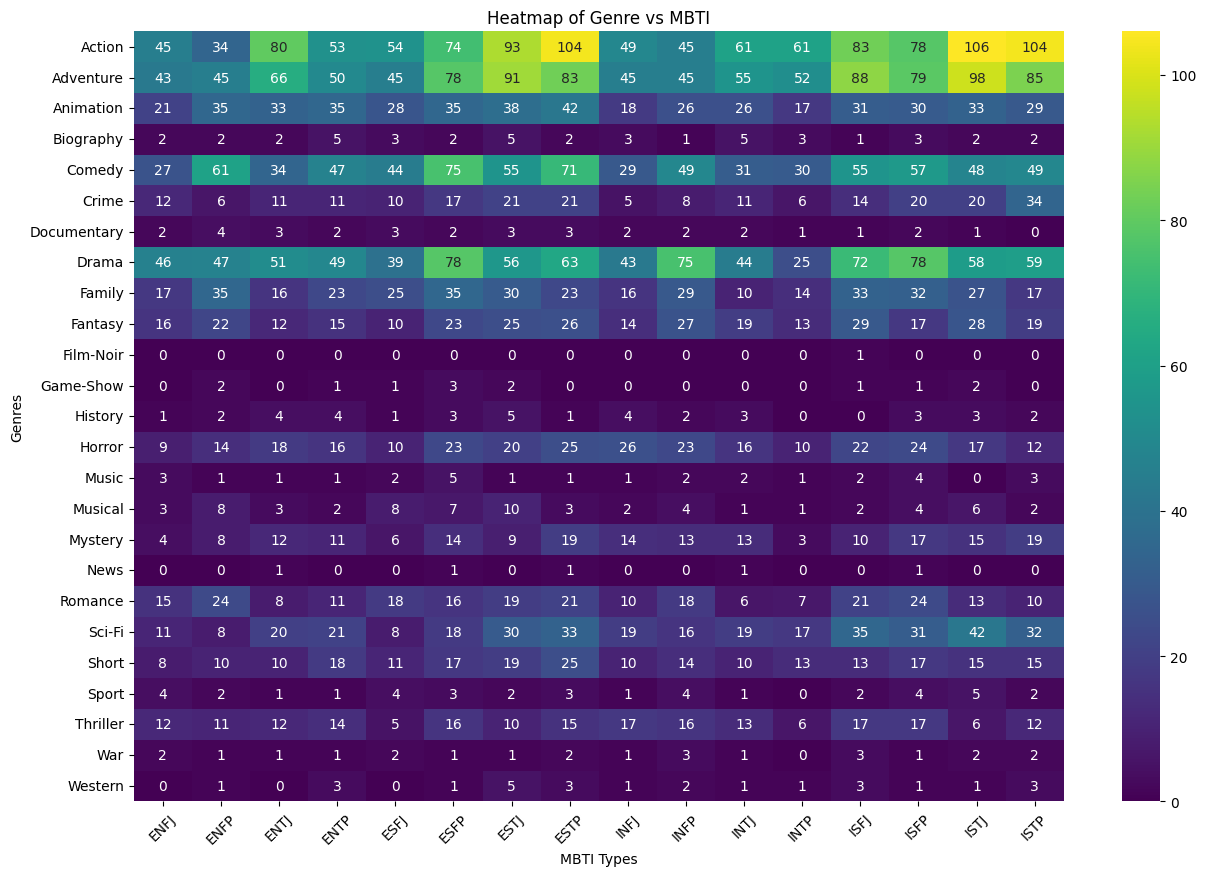

In [60]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Preparing data for the genre vs MBTI visualization
# Splitting genres into individual genres for each movie
df_expanded = df.drop('genre', axis=1).join(
    df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
)

# Grouping by genre and MBTI and counting occurrences
genre_mbti_counts = df_expanded.groupby(['genre', 'mbti']).size().unstack(fill_value=0)

# Plotting a heatmap for Genre vs MBTI
plt.figure(figsize=(15, 10))
sns.heatmap(genre_mbti_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Genre vs MBTI')
plt.xlabel('MBTI Types')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
